In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from tqdm import tnrange

In [2]:
df = pd.read_csv("Processed_load_final.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,Secondary_Accident,severity_ave,Secondary_Accident_Scale,main_Accident_code,main_Accident_order
0,0,A-2478859,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,3,0,0.0,-0.145533,A-2478859,1
1,1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,3,1,2.0,2.362577,A-1,1
2,2,A-2478860,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,2,0,0.0,-0.145533,A-2478860,1
3,3,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,2,0,0.0,-0.145533,A-2,1
4,4,A-2478861,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,2,0,0.0,-0.145533,A-2478861,1


In [4]:
df["Secondary_Accident"].value_counts()

0      3348392
1       143247
2        16022
3         3207
4         1289
5          475
6          280
8          175
7          162
9           52
10          51
11          36
12          33
13          28
14          17
15          14
16          12
20          12
17          10
18           8
33           8
31           8
28           7
26           7
22           6
19           5
38           5
21           5
96           4
32           4
29           4
23           3
24           3
27           3
25           2
77           2
30           2
106          1
115          1
99           1
98           1
97           1
92           1
84           1
46           1
75           1
65           1
62           1
59           1
41           1
40           1
37           1
124          1
126          1
Name: Secondary_Accident, dtype: int64

전처리를 통해 다음 세 가지 Feature를 추가:



색상: 심각도

크기: 2차사고 빈도 수

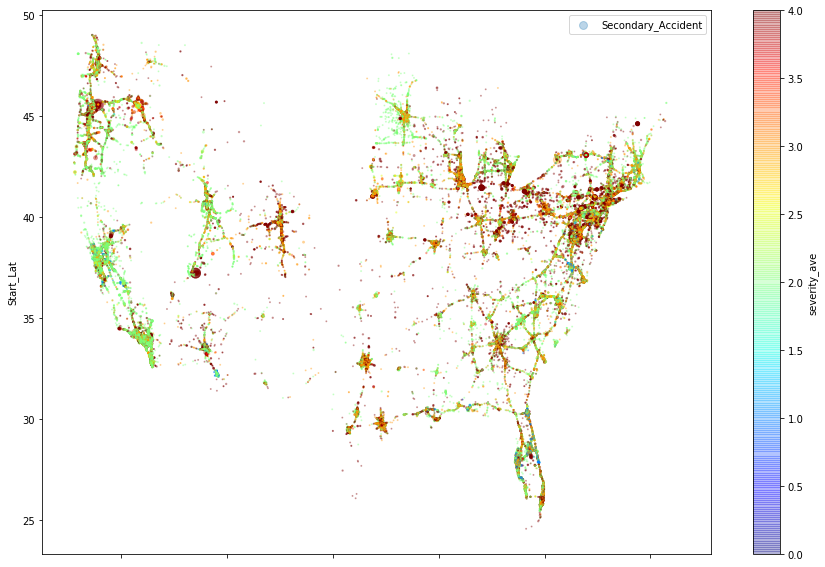

In [5]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident", figsize = (15, 10))

In [6]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df["Secondary_Accident_Scale"] = std_scaler.fit_transform(df[["Secondary_Accident"]])

사고수 Scale해서 같은 Plot

/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


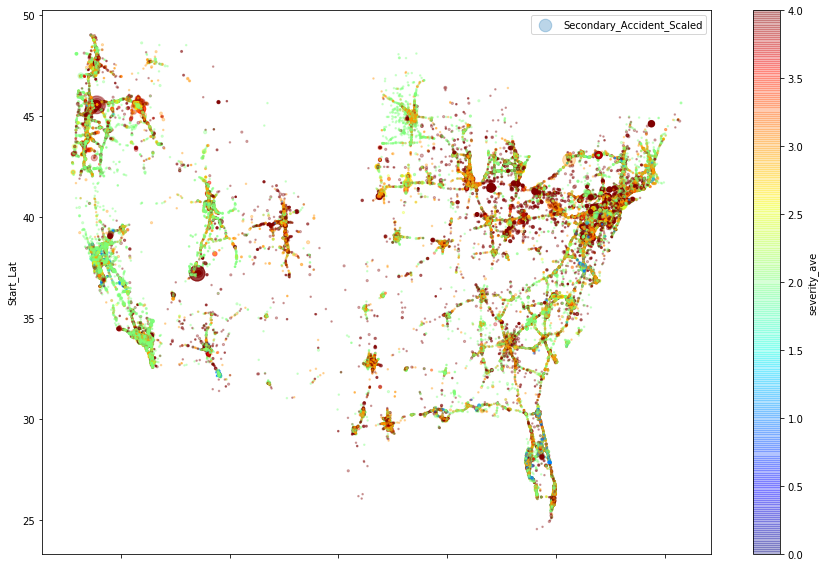

In [7]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident_Scale"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident_Scaled", figsize = (15, 10))

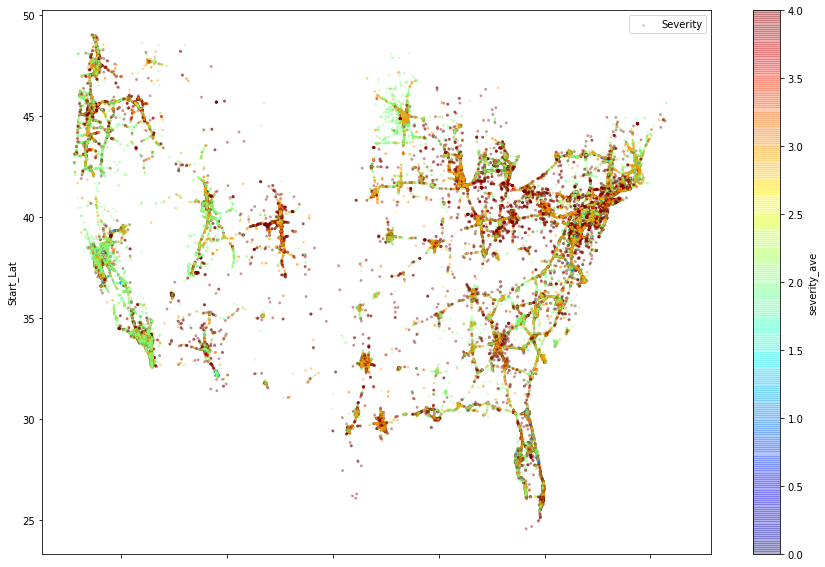

In [8]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["severity_ave"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Severity", figsize = (15, 10))

In [47]:
only_secondary = df.loc[(df["Secondary_Accident"]>=1) | (df["main_Accident_order"]>1)]

In [48]:
#only_secondary.to_csv("Secondary_Accidents_Only.csv")

In [49]:
only_secondary.shape

(314577, 13)

In [50]:
only_secondary.head()

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,Secondary_Accident,severity_ave,Secondary_Accident_Scale,main_Accident_code,main_Accident_order
1,1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,3,1,2.0,2.362577,A-1,1
10,10,A-6,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,3,1,3.0,2.362577,A-6,1
15,15,A-10,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,3,0,0.0,-0.145533,A-6,2
51,51,A-34,2016-02-08 19:28:00,2016-02-08 21:00:00,39.974415,-82.848854,0.01,3,2,2.5,4.870687,A-34,1
55,55,A-35,2016-02-08 20:22:38,2016-02-08 21:07:38,39.994766,-83.024490,0.01,2,1,2.0,2.362577,A-35,1


In [51]:
only_secondary

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,Secondary_Accident,severity_ave,Secondary_Accident_Scale,main_Accident_code,main_Accident_order
1,1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,3,1,2.0,2.362577,A-1,1
10,10,A-6,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,3,1,3.0,2.362577,A-6,1
15,15,A-10,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,3,0,0.0,-0.145533,A-6,2
51,51,A-34,2016-02-08 19:28:00,2016-02-08 21:00:00,39.974415,-82.848854,0.01,3,2,2.5,4.870687,A-34,1
55,55,A-35,2016-02-08 20:22:38,2016-02-08 21:07:38,39.994766,-83.024490,0.01,2,1,2.0,2.362577,A-35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513235,3513235,A-560803,2020-06-30 16:36:58,2020-06-30 17:36:52,34.788586,-82.482292,0.00,2,0,0.0,-0.145533,A-560786,2
3513435,3513435,A-560829,2020-06-30 18:32:14,2020-06-30 19:17:00,33.763710,-84.383858,0.00,3,0,0.0,-0.145533,A-560826,2
3513488,3513488,A-561042,2020-06-30 19:08:57,2020-06-30 21:48:22,41.596802,-93.597961,0.00,3,1,3.0,2.362577,A-561042,1
3513537,3513537,A-561482,2020-06-30 19:57:22,2020-06-30 20:59:47,39.509411,-119.781822,0.00,2,0,0.0,-0.145533,A-561481,2


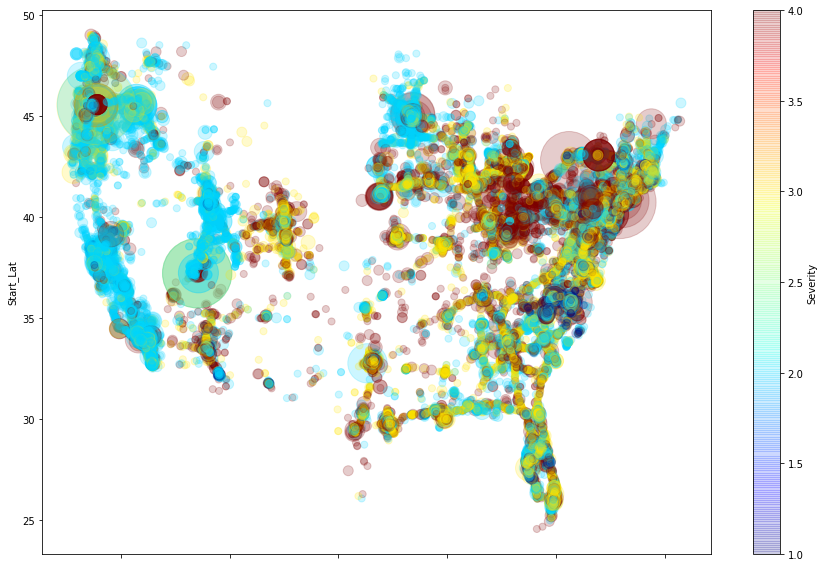

In [232]:
only_secondary.loc[only_secondary["main_Accident_order"]==1].plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.2, s = (only_secondary.loc[only_secondary["main_Accident_order"]==1]["Secondary_Accident"])*50, c = "Severity", cmap =  plt.get_cmap("jet"), figsize = (15, 10))

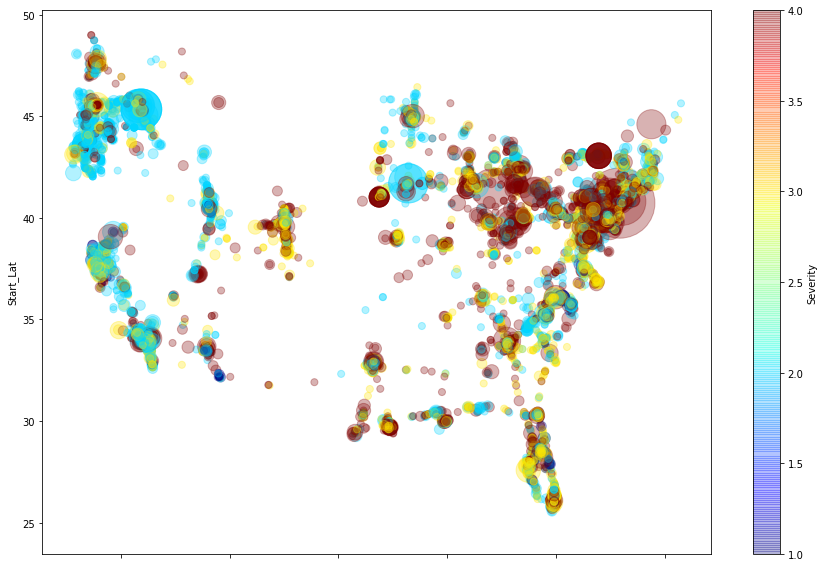

In [81]:
only_secondary.loc[only_secondary["main_Accident_order"]==2].plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]==2]["Secondary_Accident"])*50, c = "Severity", cmap =  plt.get_cmap("jet"), figsize = (15, 10))

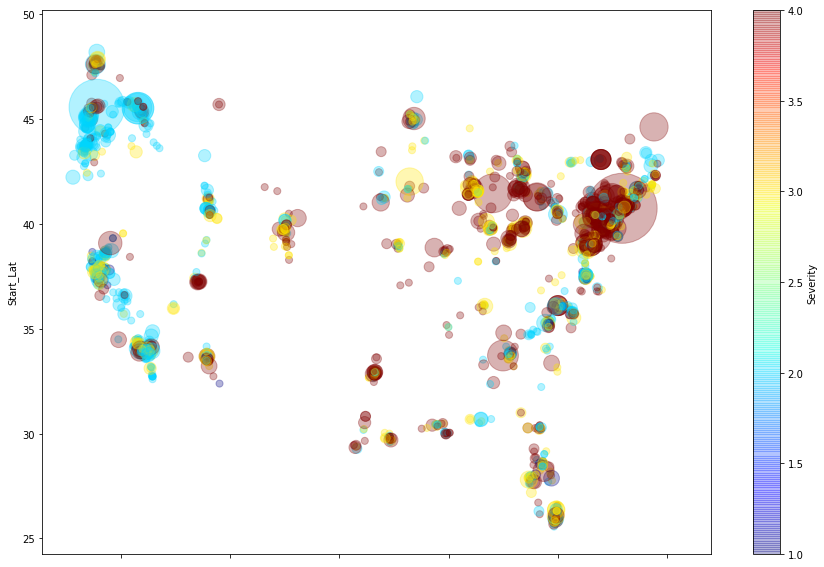

In [82]:
only_secondary.loc[only_secondary["main_Accident_order"]==3].plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]==3]["Secondary_Accident"])*50, c = "Severity", cmap =  plt.get_cmap("jet"), figsize = (15, 10))

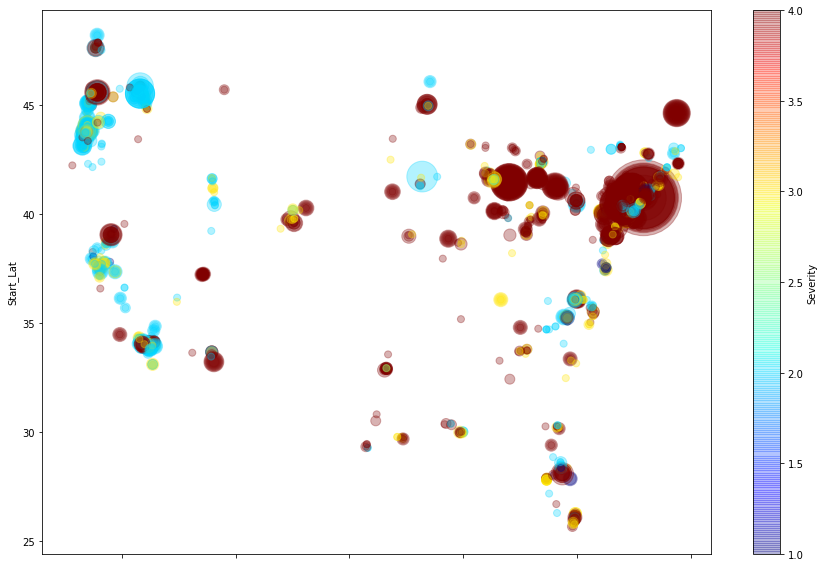

In [83]:
only_secondary.loc[only_secondary["main_Accident_order"]>=4].plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]>=4]["Secondary_Accident"])*50, c = "Severity", cmap =  plt.get_cmap("jet"), figsize = (15, 10))

In [ ]:
only_secondary.loc[only_secondary["main_Accident_order"]==1].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = only_secondary.loc[only_secondary["main_Accident_order"]==1]["Secondary_Accident"]*30, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

In [ ]:
only_secondary.loc[only_secondary["main_Accident_order"]==2].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]==2]["Secondary_Accident"])*30, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

In [ ]:
only_secondary.loc[only_secondary["main_Accident_order"]==3].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]==3]["Secondary_Accident"])*30, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

In [ ]:
only_secondary.loc[only_secondary["main_Accident_order"]>=4].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = (only_secondary.loc[only_secondary["main_Accident_order"]>=4]["Secondary_Accident"])*30, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

0개인 것을 제외하고 확대해서 보기

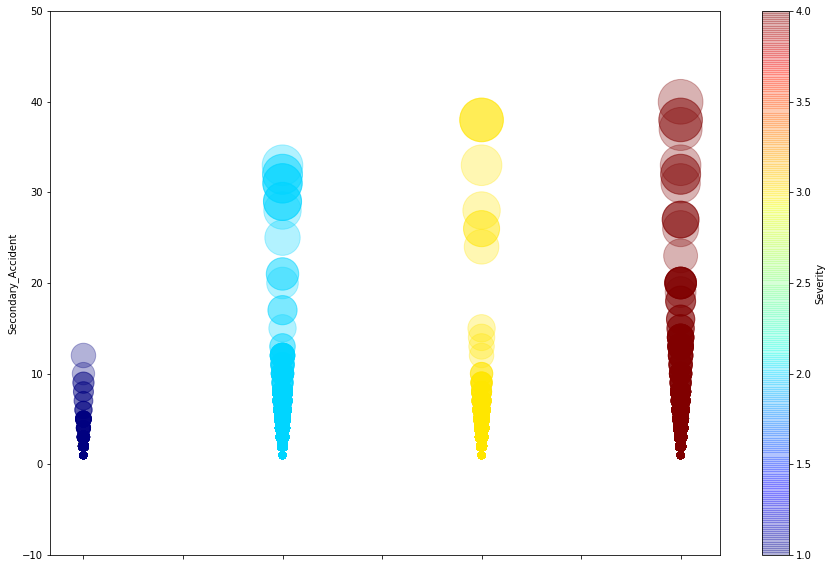

In [97]:
only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==1].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==1]["Secondary_Accident"]*50, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

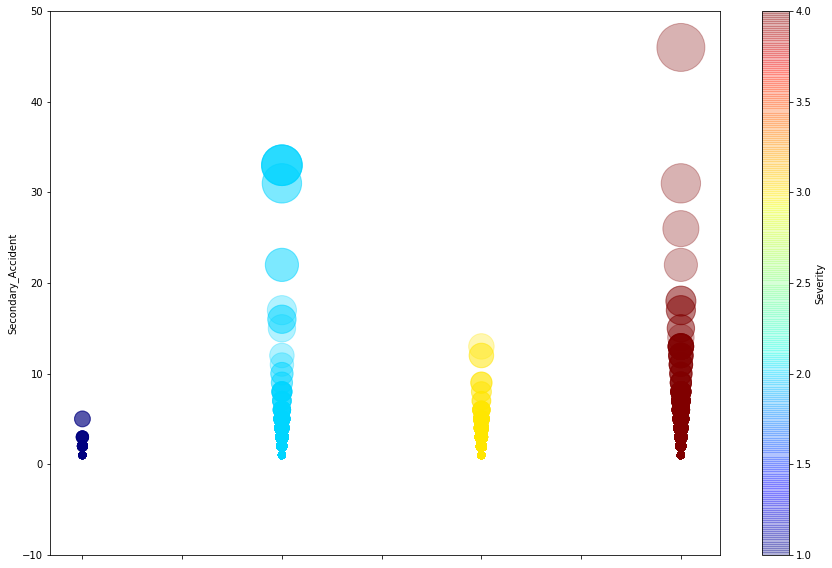

In [98]:
only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==2].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==2]["Secondary_Accident"]*50, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

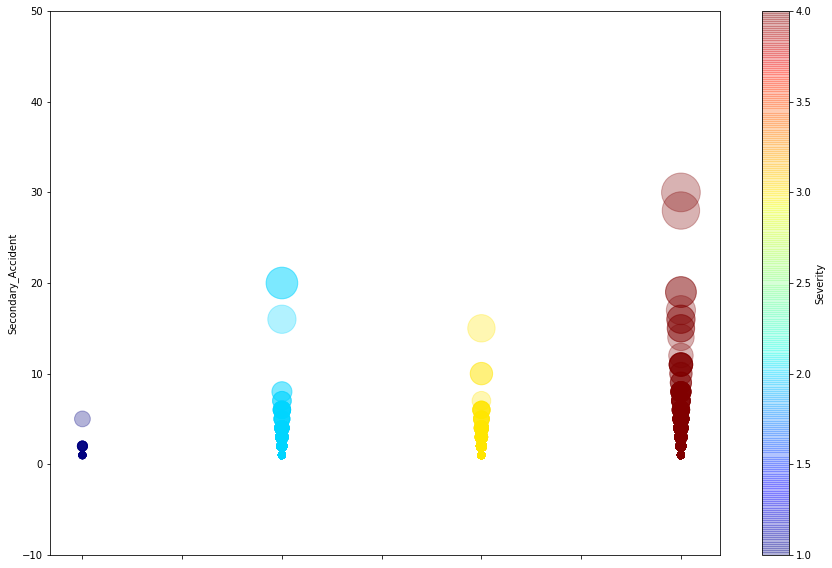

In [100]:
only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==3].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = only_secondary.loc[only_secondary["Secondary_Accident"]!=0].loc[only_secondary["main_Accident_order"]==3]["Secondary_Accident"]*50, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

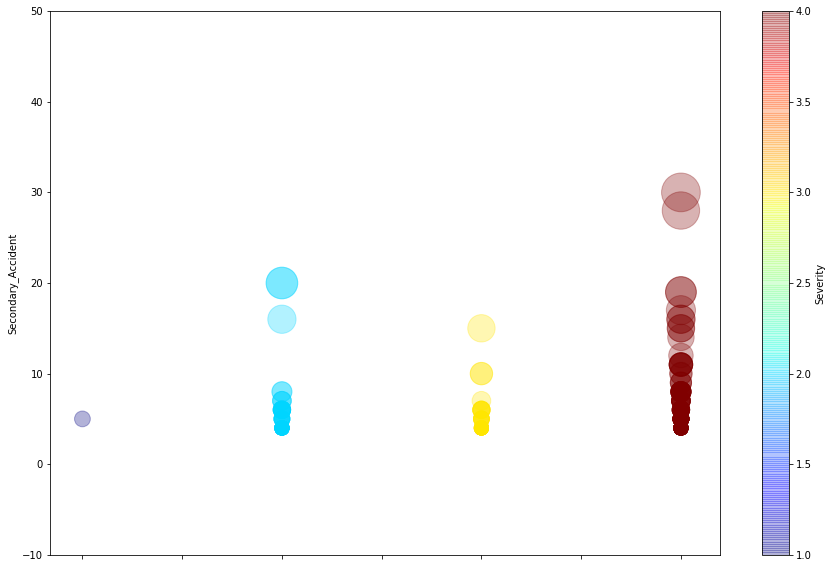

In [101]:
only_secondary.loc[only_secondary["Secondary_Accident"]>=4].loc[only_secondary["main_Accident_order"]==3].plot(kind = "scatter", x = "Severity", y = "Secondary_Accident", alpha = 0.3, s = only_secondary.loc[only_secondary["Secondary_Accident"]>=4].loc[only_secondary["main_Accident_order"]==3]["Secondary_Accident"]*50, c = "Severity", cmap =  plt.get_cmap("jet"), ylim = (-10, 50), figsize = (15, 10))

Ratio를 살펴보기

In [185]:
def get_ratio(data, i, j): #Severity, 차수
    vc = only_secondary.loc[only_secondary["main_Accident_order"]==j]["Severity"].value_counts()[i]
    entire = only_secondary.loc[only_secondary["main_Accident_order"]==j]["Severity"].value_counts().sum()
    return (vc/entire)*100

In [193]:
changes = {}
for i in range(1, 5):
    changes[i]=[]
    
for j in np.unique(only_secondary["main_Accident_order"].values)[1:]:
    for i in range(1, 5):
        try:
            changes[i].append(get_ratio(only_secondary, i, j))
        except:
            changes[i].append(0)

In [194]:
changes

{1: [0.47474273432770847,
  0.9382546712095898,
  1.1101000909918108,
  3.048098434004474,
  2.7012425715829282,
  4.2993630573248405,
  0.7604562737642585,
  1.1597938144329898,
  0.7751937984496124,
  3.076923076923077,
  0.3436426116838488,
  0.2012072434607646,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 2: [47.04510055976113,
  47.32787112495714,
  42.666060054595086,
  37.41610738255034,
  44.30037817396002,
  32.64331210191082,
  26.996197718631176,
  63.144329896907216,
  45.73643410852713,
  30.76923076923077,
  64.60481099656357,
  50.10060362173038,
  59.36507936507937,
  51.724137931034484,
  18.75,
  53.333333333333336,
  9.090909090909092,
  25.0,
  0,
  0,
  50.0,
  0,
  66.66666666666666,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 3: [45.7902290055568,
  43.156796509634255,
  45.65059144676979,
  37.8076062639821,
  30.740140464613724,
  27.70700636942675,
  20.15209125

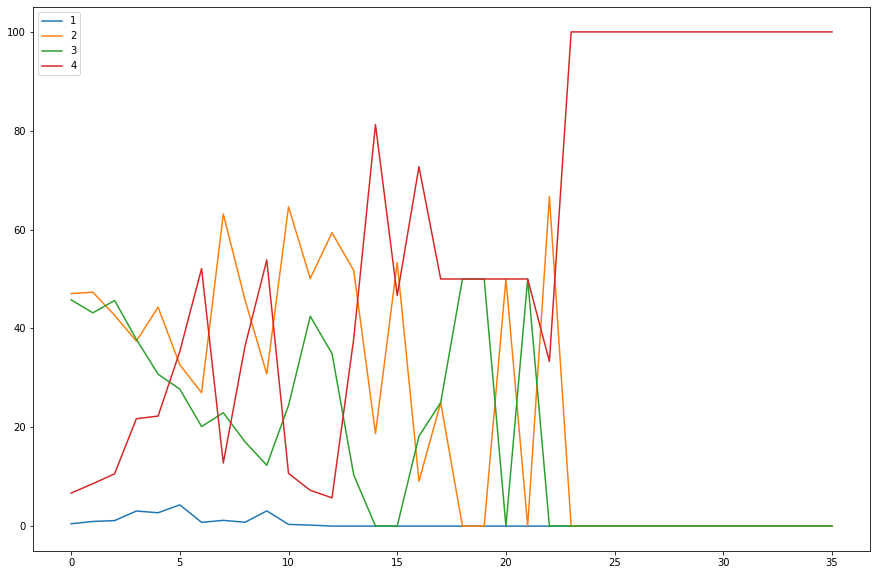

In [199]:
df_ratio = pd.DataFrame(changes)
df_ratio.plot(kind = "line", figsize = (15, 10))

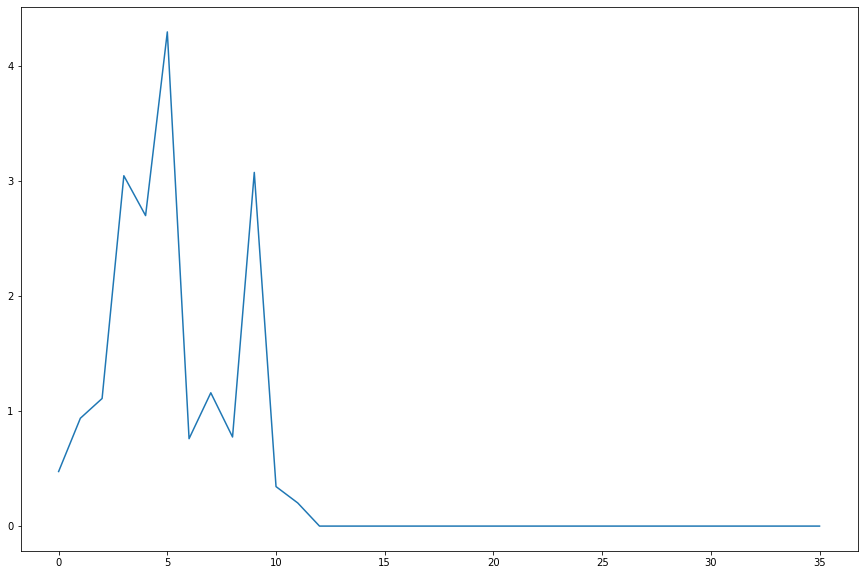

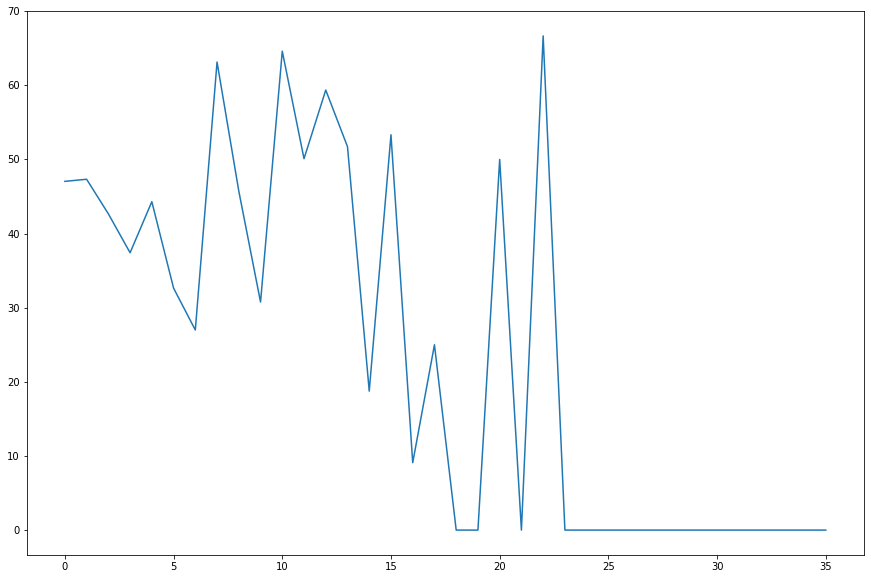

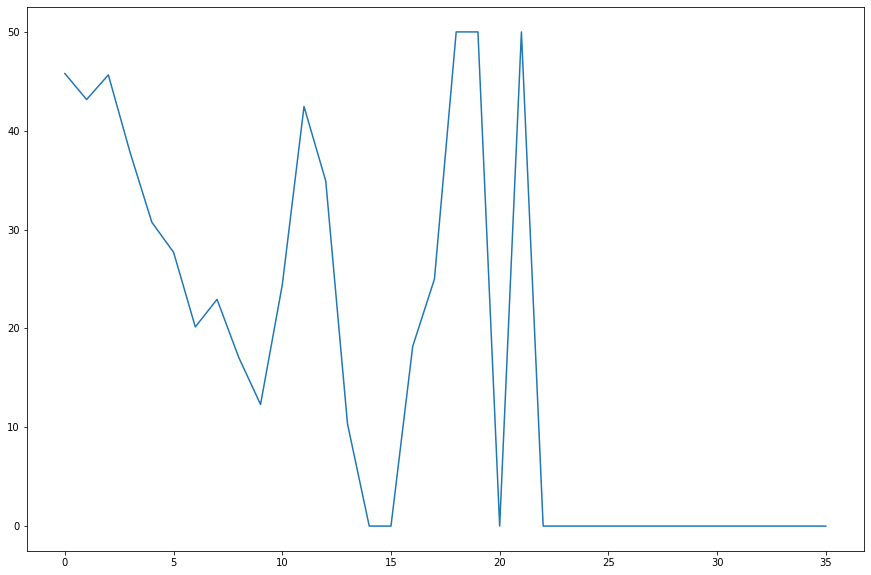

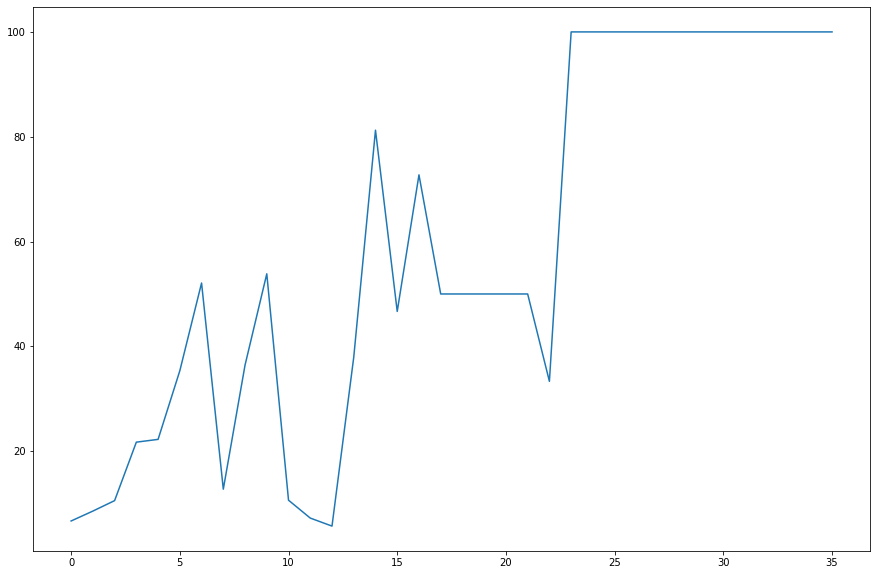

In [201]:
for i in df_ratio.columns:
    df_ratio[i].plot(kind = "line", figsize = (15, 10))
    plt.show()

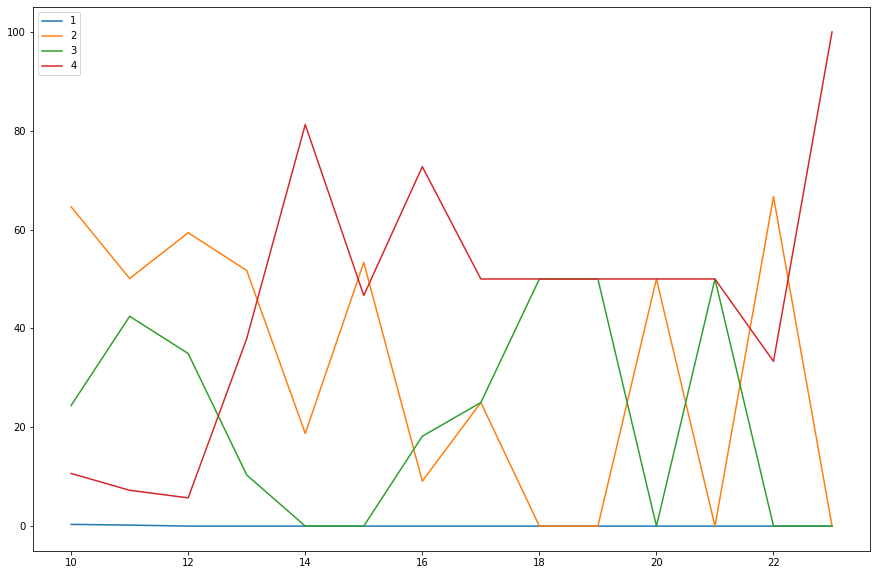

In [218]:
df_ratio.iloc[10:24].plot(kind = "line", figsize = (15, 10))

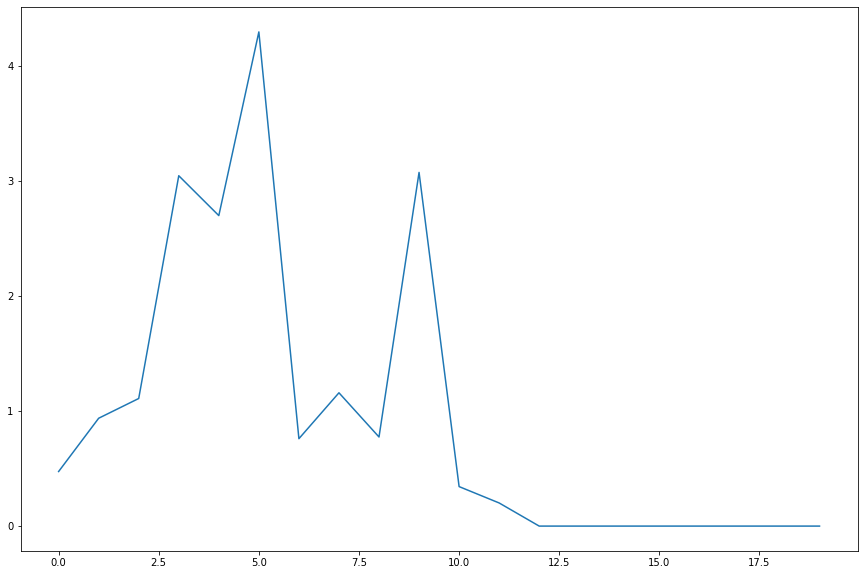

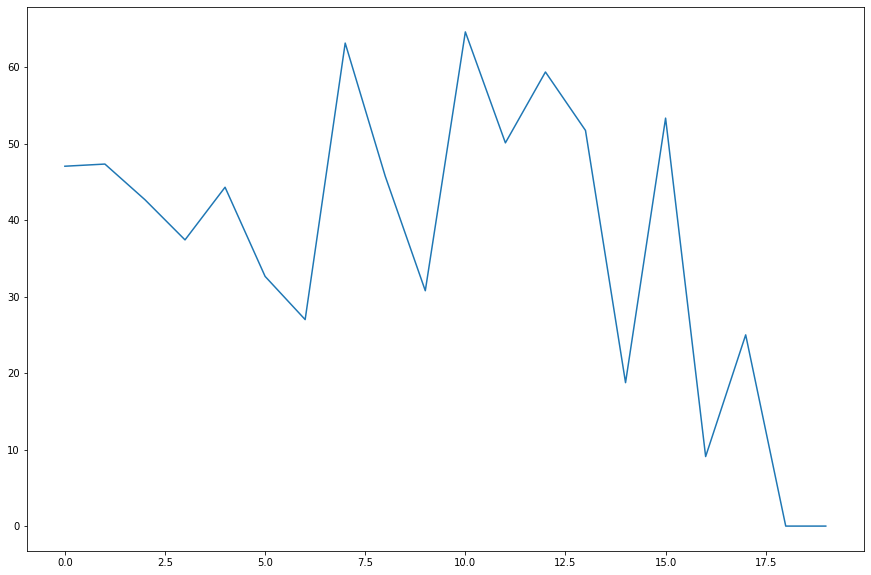

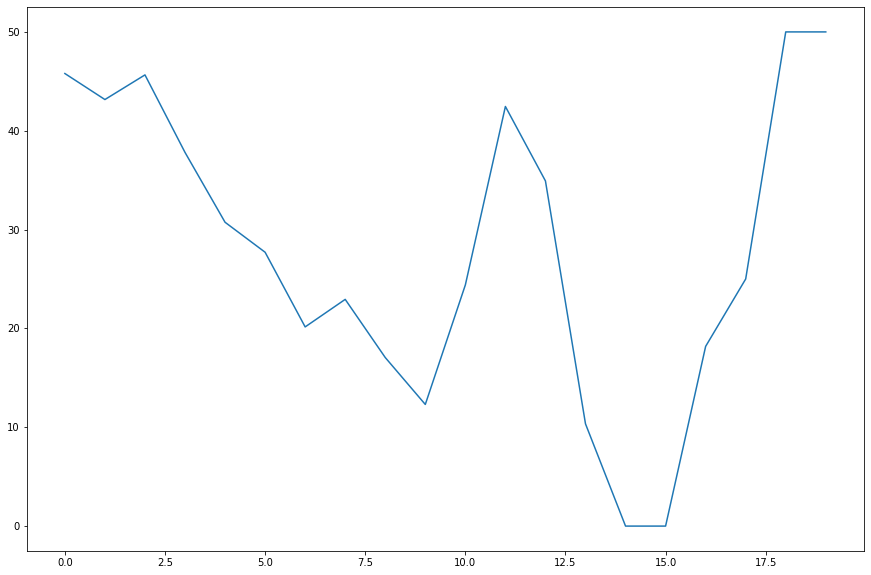

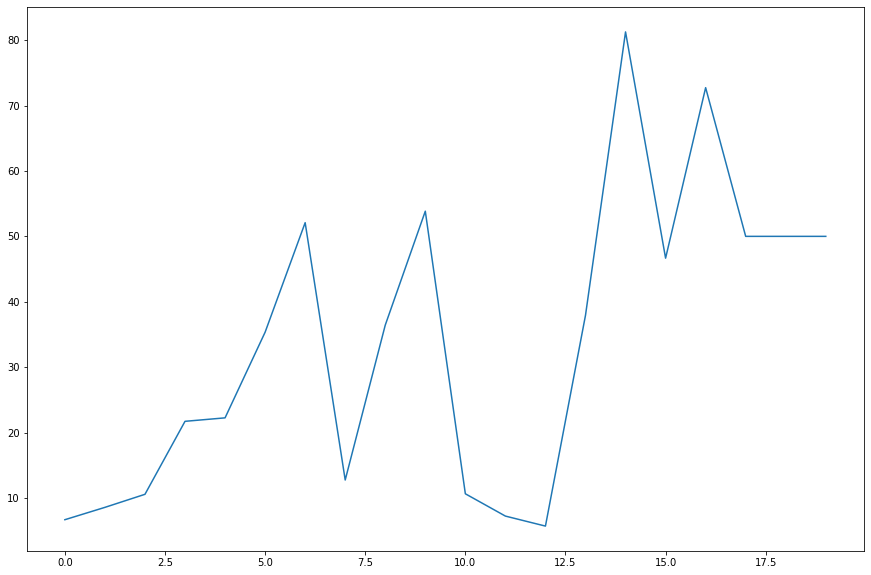

In [203]:
for i in df_ratio.columns:
    df_ratio.iloc[:20][i].plot(kind = "line", figsize = (15, 10))
    plt.show()

/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


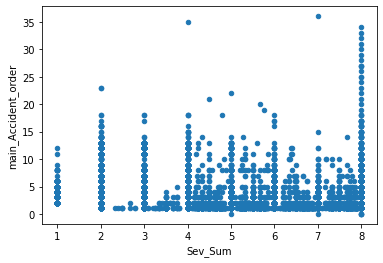

In [229]:
only_secondary["Sev_Sum"] = (only_secondary["Severity"]+ only_secondary["severity_ave"])
only_secondary["Total_Network"] = only_secondary["main_Accident_order"]+ only_secondary["Secondary_Accident"]
only_secondary.plot(kind = "scatter", x = "Sev_Sum", y = "main_Accident_order")

In [230]:
only_secondary[["Sev_Sum", "Severity", "main_Accident_order", "Secondary_Accident", "Total_Network"]].corr()

,Sev_Sum,Severity,main_Accident_order,Secondary_Accident,Total_Network
Sev_Sum,1.000000,0.510396,-0.378102,0.473517,0.102330
Severity,0.510396,1.000000,0.032074,0.053844,0.068319
main_Accident_order,-0.378102,0.032074,1.000000,-0.194820,0.595517
Secondary_Accident,0.473517,0.053844,-0.194820,1.000000,0.671931
Total_Network,0.102330,0.068319,0.595517,0.671931,1.000000


상관관계가 좋지 못함으로 나온 결론:

1. 사고의 심각도가 높지만 연쇄사고가 적은 경우, 또 반대로 연쇄사고지만 심각도가 낮은 사고가 충분히 많아서, '상관관계'로 설며되는 변수는 아니다. 

2. 그러나 연쇄사고로 갈수록 (차수가 높아질수록), 사고에서 Severity가 차지하는 비율이 달라진다. 1에 해당하는 사고들이 여전히 많이 발생하지만, 그 안에서 비율이 달라진다고 볼수있다. 

3. 통념과는 다르게, 사고의 차수가 높아질수록 Severity가 더 높은 사고가 차지하는 비율이 높고, severity 1이 차지하는 비율은 감소함은 알수있다. 